# KMeans (Mall)

In [14]:
import numpy as nm    
import matplotlib.pyplot as plt    
import pandas as pd    
from sklearn.cluster import KMeans  

In [38]:
# Importing the dataset  
dataset = pd.read_csv('datasets/Mall_Customers.csv', sep = ',')  

In [39]:
dataset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
dataset.drop('CustomerID', inplace = True, axis = 1)

Annual Income (k$)	-> Receita do Cliente

Spending Score (1-100) -> Faixa de gasto

Age -> Idade

In [41]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [42]:
X = dataset.drop(['Gender', 'Age'], axis = 1)

In [43]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Gráfico do Cotovelo

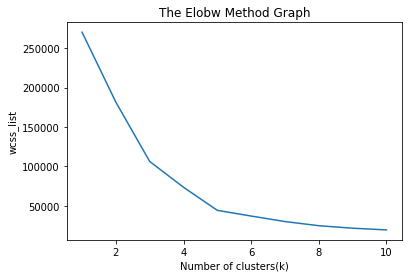

In [44]:
wcss_list= []  #Initializing the list for the values of WCSS  

#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    wcss_list.append(kmeans.inertia_)  
    
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  


In [21]:
for cluster, wcss in enumerate(wcss_list):
    print(f'{cluster+1} - {wcss}')

1 - 269981.28
2 - 181363.59595959596
3 - 106348.37306211116
4 - 73679.78903948836
5 - 44448.4554479337
6 - 37233.814510710006
7 - 30259.65720728547
8 - 25011.839349156588
9 - 21850.16528258563
10 - 19672.072849014323


A partir do gráfico acima, podemos ver que o ponto do cotovelo está em 5. Portanto, o número de clusters aqui será 5.


# Treinamento do K-Means 

In [45]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(X)  

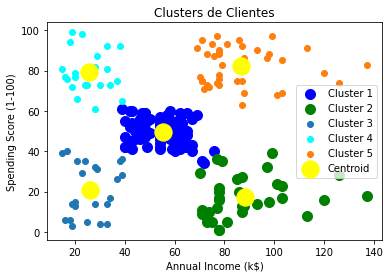

In [46]:
#visulaizing the clusters  
plt.scatter(X[y_predict == 0]['Annual Income (k$)'], X[y_predict == 0]['Spending Score (1-100)'], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1]['Annual Income (k$)'], X[y_predict == 1]['Spending Score (1-100)'], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(X[y_predict == 2]['Annual Income (k$)'], X[y_predict == 2]['Spending Score (1-100)'], label = 'Cluster 3') #for third cluster  
plt.scatter(X[y_predict == 3]['Annual Income (k$)'], X[y_predict == 3]['Spending Score (1-100)'], c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(X[y_predict == 4]['Annual Income (k$)'], X[y_predict == 4]['Spending Score (1-100)'], label = 'Cluster 5') #for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   

plt.title('Clusters de Clientes')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  

A imagem de saída mostra claramente os cinco clusters diferentes com cores diferentes. Os clusters são formados entre dois parâmetros do conjunto de dados; Renda anual do cliente e Gastos. Podemos alterar as cores e rótulos conforme a exigência ou escolha. Também podemos observar alguns pontos dos padrões acima, que são dados abaixo:

* O Cluster1 mostra os clientes com salário médio e gastos médios para que possamos categorizar esses clientes __comuns__.
* O Cluster2 mostra que o cliente tem uma renda alta, mas um gasto baixo, então podemos categorizá-lo como __cuidadoso__.
* O Cluster3 mostra a baixa renda e também o baixo gasto para que possam ser categorizados como __sensatos__.
* O Cluster4 mostra os clientes de baixa renda com gastos muito altos para que possam ser categorizados como __descuidados__.
* O Cluster5 mostra os clientes com alta renda e alto gasto para que possam ser categorizados como __alvo__, e esses clientes podem ser os clientes mais rentáveis para o dono do shopping.